# PREDICT CUSTOMER TOTAL AMOUNT

## Import Library & Understanding Dataset

In [152]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv('merged_file.csv')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,"10,53"
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,Lingga,Lingga,Modern Trade,-3.654703,128.190643,36,0,Married,"10,53"
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,Lingga,Lingga,Modern Trade,-5.135399,119.423790,36,0,Married,"10,53"
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,"10,53"
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,"10,53"


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   5020 non-null   object 
 1   CustomerID      5020 non-null   int64  
 2   Date            5020 non-null   object 
 3   ProductID       5020 non-null   object 
 4   Price           5020 non-null   int64  
 5   Qty             5020 non-null   int64  
 6   TotalAmount     5020 non-null   int64  
 7   StoreID         5020 non-null   int64  
 8   Product Name    5020 non-null   object 
 9   StoreName       5020 non-null   object 
 10  GroupStore      5020 non-null   object 
 11  Type            5020 non-null   object 
 12  Latitude        5020 non-null   float64
 13  Longitude       5020 non-null   float64
 14  Age             5020 non-null   int64  
 15  Gender          5020 non-null   int64  
 16  Marital Status  4976 non-null   object 
 17  Income          5020 non-null   o

In [155]:
df[df.duplicated()]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income


In [156]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price              0
Qty                0
TotalAmount        0
StoreID            0
Product Name       0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
Age                0
Gender             0
Marital Status    44
Income             0
dtype: int64

In [157]:
df.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID,Latitude,Longitude,Age,Gender
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841,-2.942236,109.600789,40.003586,0.452988
std,129.672955,4600.708780,1.855295,19675.462455,4.028502,4.323225,8.357593,12.834719,0.497835
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,-7.797068,95.323753,0.000000,0.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000,-6.914864,104.756554,30.000000,0.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,-5.135399,110.370529,39.000000,0.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000,0.533505,114.590111,51.000000,1.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,5.548290,128.190643,72.000000,1.000000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   5020 non-null   object 
 1   CustomerID      5020 non-null   int64  
 2   Date            5020 non-null   object 
 3   ProductID       5020 non-null   object 
 4   Price           5020 non-null   int64  
 5   Qty             5020 non-null   int64  
 6   TotalAmount     5020 non-null   int64  
 7   StoreID         5020 non-null   int64  
 8   Product Name    5020 non-null   object 
 9   StoreName       5020 non-null   object 
 10  GroupStore      5020 non-null   object 
 11  Type            5020 non-null   object 
 12  Latitude        5020 non-null   float64
 13  Longitude       5020 non-null   float64
 14  Age             5020 non-null   int64  
 15  Gender          5020 non-null   int64  
 16  Marital Status  4976 non-null   object 
 17  Income          5020 non-null   o

## Feature Engineering & EDA

In [159]:
# df['Latitude'] = df['Latitude'].str.replace(',', '.').astype(float)
# df['Longitude'] = df['Longitude'].str.replace(',', '.').astype(float)
df['Income'] = df['Income'].str.replace(',', '.').astype(float)

In [160]:
null_rows = df[~df['Marital Status'].isin(['Married', 'Single'])].shape[0]
total_rows = df['Marital Status'].shape[0]

marital_status_pct_null = null_rows/total_rows*100
print(f"Pct Null Marital Status Rows : {round(marital_status_pct_null, 3)} %")

Pct Null Marital Status Rows : 0.876 %


In [161]:
df = df.dropna(subset=['Marital Status'])

In [162]:
df

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,10.53
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,Lingga,Lingga,Modern Trade,-3.654703,128.190643,36,0,Married,10.53
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,Lingga,Lingga,Modern Trade,-5.135399,119.423790,36,0,Married,10.53
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR93855,387,28/11/2022,P5,4200,3,12600,11,Thai Tea,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,9.10
5016,TR83113,387,19/07/2022,P5,4200,2,8400,5,Thai Tea,Bonafid,Gita,General Trade,-7.250445,112.768845,36,0,Married,9.10
5017,TR92378,387,20/10/2022,P7,9400,2,18800,5,Coffee Candy,Bonafid,Gita,General Trade,-7.250445,112.768845,36,0,Married,9.10
5018,TR39280,387,06/11/2022,P7,9400,4,37600,1,Coffee Candy,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,36,0,Married,9.10


### Data Distribution

In [163]:
def plot_box(data, labels, title, figsize=(15, 6)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize) 
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value')
    ax.set_title(title)
    ax.set_yticklabels(labels)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   4976 non-null   object 
 1   CustomerID      4976 non-null   int64  
 2   Date            4976 non-null   object 
 3   ProductID       4976 non-null   object 
 4   Price           4976 non-null   int64  
 5   Qty             4976 non-null   int64  
 6   TotalAmount     4976 non-null   int64  
 7   StoreID         4976 non-null   int64  
 8   Product Name    4976 non-null   object 
 9   StoreName       4976 non-null   object 
 10  GroupStore      4976 non-null   object 
 11  Type            4976 non-null   object 
 12  Latitude        4976 non-null   float64
 13  Longitude       4976 non-null   float64
 14  Age             4976 non-null   int64  
 15  Gender          4976 non-null   int64  
 16  Marital Status  4976 non-null   object 
 17  Income          4976 non-null   f

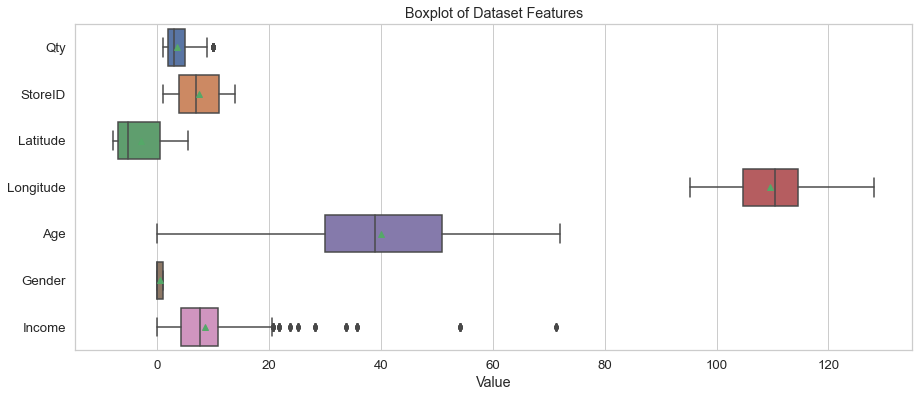

In [165]:
df_col_num = df[['Qty', 'StoreID', 'Latitude', 'Longitude', 'Age', 'Gender', 'Income']]
plot_box(data = df_col_num,
         labels = df_col_num.columns.tolist(),
         title='Boxplot of Dataset Features')

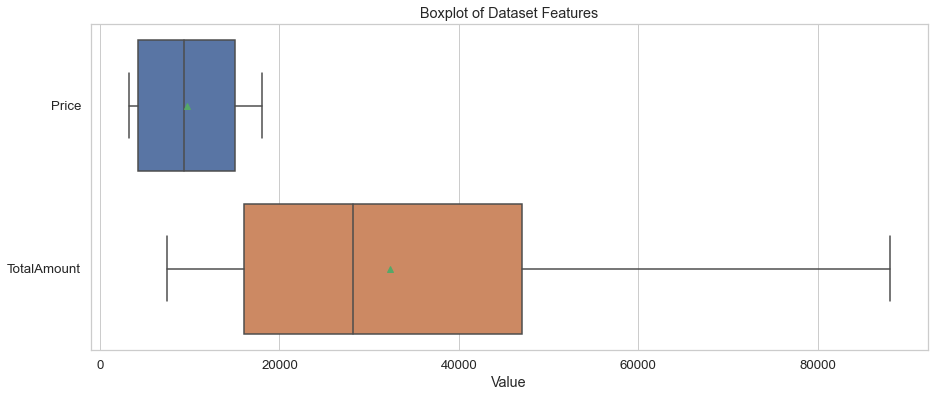

In [166]:
df_col_num = df[['Price', 'TotalAmount']]
plot_box(data = df_col_num,
         labels = df_col_num.columns.tolist(),
         title='Boxplot of Dataset Features')

In [167]:
def plot_string_columns(dataframe, column_names):
    num_cols = len(column_names)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(16, 7))

    for i, col in enumerate(column_names):
        value_counts = dataframe[col].value_counts()
        labels = value_counts.index
        counts = value_counts.values

        # Menggunakan warna langsung pada fungsi color
        bars = axes[i].bar(labels, counts, color='steelblue')

        axes[i].set_title(f"Distribusi Data pada Kolom {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Counts")

        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width() / 2, height, height,
                         ha='center', va='bottom')

        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    plt.show()


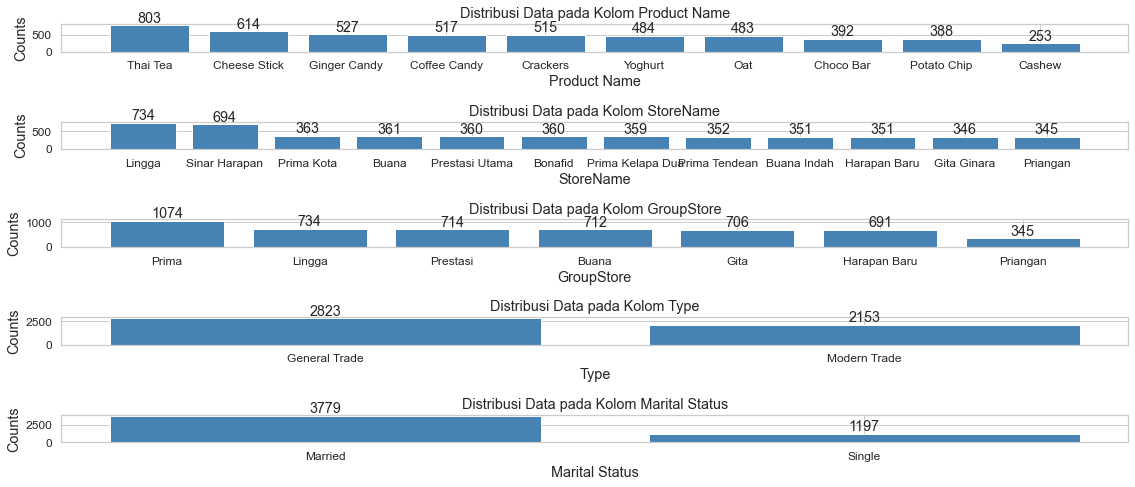

In [168]:
col = ['Product Name', 'StoreName', 'GroupStore', 'Type', 'Marital Status']
plot_string_columns(df, col)

### Multikolinearitas

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   4976 non-null   object 
 1   CustomerID      4976 non-null   int64  
 2   Date            4976 non-null   object 
 3   ProductID       4976 non-null   object 
 4   Price           4976 non-null   int64  
 5   Qty             4976 non-null   int64  
 6   TotalAmount     4976 non-null   int64  
 7   StoreID         4976 non-null   int64  
 8   Product Name    4976 non-null   object 
 9   StoreName       4976 non-null   object 
 10  GroupStore      4976 non-null   object 
 11  Type            4976 non-null   object 
 12  Latitude        4976 non-null   float64
 13  Longitude       4976 non-null   float64
 14  Age             4976 non-null   int64  
 15  Gender          4976 non-null   int64  
 16  Marital Status  4976 non-null   object 
 17  Income          4976 non-null   f

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

# Tambahkan sebuah konstanta pada dataframe (prasyarat perhitungan)
selected_columns = ['Price', 'Qty', 'TotalAmount', 'StoreID', 'Latitude', 'Longitude', 'Age', 'Gender', 'Income']
df_selected = df[selected_columns]

X = add_constant(df_selected)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

vif_data

,feature,VIF
1,Price,6.065156
2,Qty,7.953070
3,TotalAmount,8.627307
4,StoreID,1.302675
5,Latitude,1.531254
6,Longitude,1.202424
7,Age,1.309632
8,Gender,1.005518
9,Income,1.314444


In [171]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,10.53
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,Lingga,Lingga,Modern Trade,-3.654703,128.190643,36,0,Married,10.53
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,Lingga,Lingga,Modern Trade,-5.135399,119.423790,36,0,Married,10.53
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53


### Drop Columns

In [172]:
df_id = df[['TransactionID', 'CustomerID', 'Date', 'Latitude', 'Longitude', 'StoreName', 'GroupStore']]
df.drop(['TransactionID', 'CustomerID', 'Date', 'Latitude', 'Longitude', 'StoreName', 'GroupStore'], axis=1, inplace=True)

In [173]:
df.head()

,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,Type,Age,Gender,Marital Status,Income
0,P3,7500,4,30000,12,Crackers,General Trade,36,0,Married,10.53
1,P9,10000,1,10000,9,Yoghurt,Modern Trade,36,0,Married,10.53
2,P5,4200,5,21000,6,Thai Tea,Modern Trade,36,0,Married,10.53
3,P8,16000,3,48000,11,Oat,General Trade,36,0,Married,10.53
4,P2,3200,3,9600,11,Ginger Candy,General Trade,36,0,Married,10.53


### Standardization Features - MinMax Scaling

In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = ['Price', 'Qty', 'TotalAmount', 'Age', 'Income']
df[col] = scaler.fit_transform(df[col])

In [175]:
df.head()

,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,Type,Age,Gender,Marital Status,Income
0,P3,0.290541,0.333333,0.279503,12,Crackers,General Trade,0.5,0,Married,0.147686
1,P9,0.459459,0.000000,0.031056,9,Yoghurt,Modern Trade,0.5,0,Married,0.147686
2,P5,0.067568,0.444444,0.167702,6,Thai Tea,Modern Trade,0.5,0,Married,0.147686
3,P8,0.864865,0.222222,0.503106,11,Oat,General Trade,0.5,0,Married,0.147686
4,P2,0.000000,0.222222,0.026087,11,Ginger Candy,General Trade,0.5,0,Married,0.147686


### Label Encoding for Categorical Columns

In [176]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [177]:
df.head()

,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,Type,Age,Gender,Marital Status,Income
0,3,0.290541,0.333333,0.279503,12,4,0,0.5,0,0,0.147686
1,9,0.459459,0.000000,0.031056,9,9,1,0.5,0,0,0.147686
2,5,0.067568,0.444444,0.167702,6,8,1,0.5,0,0,0.147686
3,8,0.864865,0.222222,0.503106,11,6,0,0.5,0,0,0.147686
4,2,0.000000,0.222222,0.026087,11,5,0,0.5,0,0,0.147686


### Heatmap

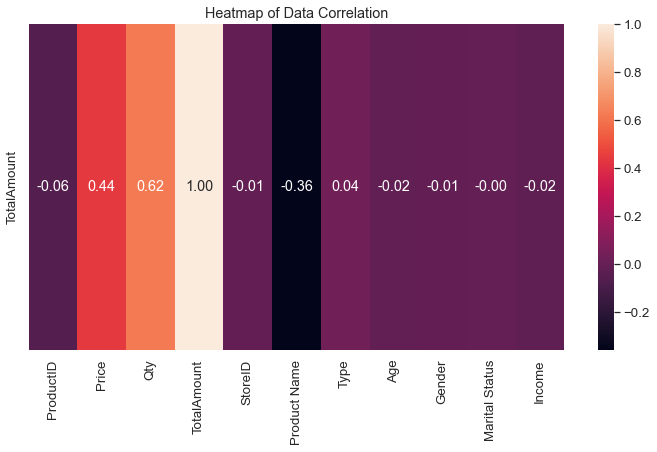

In [178]:
corr = df.corr()
plt.figure(figsize=(12, 6)) 
sns.set(font_scale=1.2)  

sns.heatmap(corr.loc[['TotalAmount']], annot=True, fmt=".2f")

plt.title('Heatmap of Data Correlation')
plt.show()

## Modelling

In [179]:
from sklearn.model_selection import train_test_split

X = df.drop('TotalAmount', axis=1)
y = df['TotalAmount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Linear Regression

In [180]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [195]:
from sklearn.metrics import mean_squared_error, r2_score

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"MSE : {round(mse_lr, 5)}")

r2_lr = r2_score(y_test, y_pred_lr)
print(f'R-Squared : {round(r2_lr, 5)}')

MSE : 0.0069
R-Squared : 0.87665


### Lasso Regression

In [190]:
from sklearn.linear_model import LassoCV

# Buat alpha dengan rentang 0 s.d 1 dengan panjang langkah 0.01 (0, 0.01, 0.02, ... , 0.09, 1)
alpha = np.arange(0, 10, 0.01)

# Lasso Cross validation
lasso_cv = LassoCV(alphas = alpha)
lasso_cv.fit(X_train, y_train)

c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.412760483054456, tolerance: 0.018182944437398606
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\marse\AppDa

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0...
       9.24, 9.25, 9.26, 9.27, 9.28, 9.29, 9.3 , 9.31, 9.32, 9.33, 9.34,
       9.35, 9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45,
       9.46, 9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56,
       9.57, 9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67,
       9.68, 9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78,
       9.79, 9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89,
       9.9 , 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]))

In [194]:
y_predict_lasso_cv = lasso_cv.predict(X_test)
mse_lasso_cv = mean_squared_error(y_test, y_predict_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_predict_lasso_cv)

print(f"MSE (Lasso Regression CV) = {round(mse_lasso_cv, 5)}")
print(f"R-Squared (Lasso Regression CV) = {round(r2_lasso_cv, 5)}")

MSE (Lasso Regression CV) = 0.0069
R-Squared (Lasso Regression CV) = 0.87665


### Ridge Regression

In [196]:
from sklearn.linear_model import RidgeCV

alpha = np.arange(1, 10, 0.1)

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = alpha)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]))

In [198]:
y_predict_ridge_cv = ridge_cv.predict(X_test)
mse_ridge_cv = mean_squared_error(y_test, y_predict_ridge_cv)
r2_ridge_cv = r2_score(y_test, y_predict_ridge_cv)

print(f"MSE (Ridge Regression CV) = {round(mse_ridge_cv, 5)}")
print(f"R-Squared (Ridge Regression CV) = {round(r2_ridge_cv, 5)}")

MSE (Ridge Regression CV) = 0.00691
R-Squared (Ridge Regression CV) = 0.8766


### Decision Tree Regressor

In [200]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'MSE: {(mse_dt)}')
print(f'R-Squared: {(r2_dt)}')

MSE: 9.612896531091564e-32
R-Squared: 1.0


### Random Forest Regressor

In [201]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rfr = mean_squared_error(y_test, y_pred_rf)
r2_rfr = r2_score(y_test, y_pred_rf)

print(f'MSE: {(mse_rfr)}')
print(f'R-Squared: {(r2_rfr)}')

MSE: 2.880999416600844e-31
R-Squared: 1.0


### XGBoost Regressor

In [202]:
from xgboost import XGBRegressor

model_xgboost = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model_xgboost.fit(X_train, y_train)
y_pred_xgboost = model_xgboost.predict(X_test)

# Hitung nilai MSE pada set pengujian
mse_xgbr = mean_squared_error(y_test, y_pred_xgboost)
r2_xgbr = r2_score(y_test, y_pred_xgboost)

print(f'MSE: {(mse_xgbr)}')
print(f'R-Squared: {(r2_xgbr)}')

MSE: 6.647652366018053e-05
R-Squared: 0.9988122829181592


### SVR (Support Vector Regressor)

In [203]:
from sklearn.svm import SVR

model_svm = SVR(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred_svr = model_svm.predict(X_test)

# Hitung nilai MSE pada set pengujian
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'MSE: {(mse_svr)}')
print(f'R-Squared: {(r2_svr)}')

MSE: 0.008153916469912557
R-Squared: 0.8543163008233561


### KNN Regressor

In [204]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Hitung nilai MSE pada set pengujian
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'MSE: {(mse_knn)}')
print(f'R-Squared: {(r2_knn)}')

MSE: 0.019208037183472762
R-Squared: 0.6568154798817991
